In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r'C:\Users\PC\advanced_machine_learning-3\AI-ML-Portfolio-Hub\Machine Learning\Supervised Learning\Regression\Datasets\train_energy_data.csv')

In [60]:
data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [62]:
data.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [63]:
data.describe(include='object')

,Building Type,Day of Week
count,1000,1000
unique,3,2
top,Residential,Weekday
freq,347,507


In [64]:
data.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


In [65]:
data = data.dropna()

In [66]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Building Type', 'Day of Week']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [67]:
data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,2,7063,76,10,29.84,0,2713.95
1,0,44372,66,45,16.72,0,5744.99
2,1,19255,37,17,14.30,1,4101.24
3,2,13265,14,41,32.82,0,3009.14
4,0,13375,26,18,11.92,0,3279.17


In [68]:
X = data.drop(columns=['Energy Consumption'])  # Features
y = data['Energy Consumption']  # Target variable

In [70]:
X.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week
0,2,7063,76,10,29.84,0
1,0,44372,66,45,16.72,0
2,1,19255,37,17,14.30,1
3,2,13265,14,41,32.82,0
4,0,13375,26,18,11.92,0


In [71]:
y.head()

,Energy Consumption
0,2713.95
1,5744.99
2,4101.24
3,3009.14
4,3279.17


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [73]:
X

array([[ 1.19680781, -1.28780475,  0.95113382, -1.10695673,  1.0129251 ,
        -0.98609664],
       [-1.22343043,  1.32351621,  0.60686937,  1.37564519, -0.82554417,
        -0.98609664],
       [-0.01331131, -0.43446574, -0.39149753, -0.61043634, -1.16465207,
         1.01409939],
       ...,
       [-1.22343043,  0.98685605,  1.36425116, -0.39764189,  1.34082283,
        -0.98609664],
       [ 1.19680781, -1.1978654 ,  0.64129581,  0.80819332, -0.8591747 ,
         1.01409939],
       [-1.22343043, -0.67537723,  0.29703137, -1.03602524,  1.23152358,
         1.01409939]])

In [74]:
X.shape

(1000, 6)

In [75]:
y.shape

(1000,)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
(X_train.shape, X_test.shape),( y_train.shape, y_test.shape)


(((800, 6), (200, 6)), ((800,), (200,)))

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
linear_model = LinearRegression()

In [81]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = linear_model.predict(X_test)

In [89]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)

In [90]:
r2_test

0.8451931910305853

In [91]:
r2_train = r2_score(y_train, linear_model.predict(X_train))

In [92]:
r2_train

0.8631990609967539

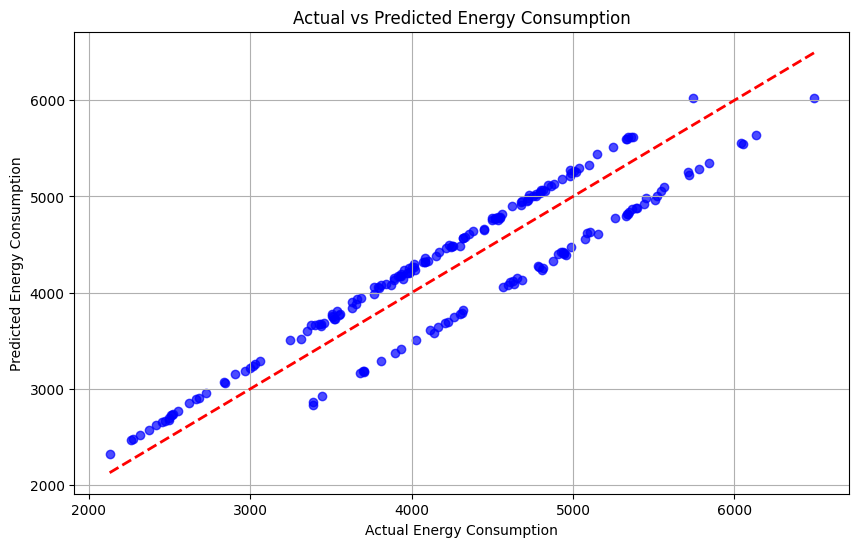

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.grid()
plt.show()

In [88]:
intercept = linear_model.intercept_

# Get the coefficients (theta_1, theta_2, ...)
coefficients = linear_model.coef_

print(f"Intercept (theta_0): {intercept}")
print("Coefficients (theta_1, theta_2, ...):")
for feature, coef in zip(data.drop(columns=['Energy Consumption']).columns, coefficients):
    print(f"  {feature}: {coef}")

Intercept (theta_0): 4165.4483128398515
Coefficients (theta_1, theta_2, ...):
  Building Type: -211.3074240257651
  Square Footage: 714.9274089653335
  Number of Occupants: 308.0642448872683
  Appliances Used: 298.02101259202504
  Average Temperature: -34.05984468053569
  Day of Week: -19.496017645621805


In [93]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [94]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [95]:
y_pred = poly_model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
r2

0.9999999997466823